# Multiple pendulum plots. Section 12.5: Chaos and sensitivity to initial conditions

Use Pendulum class to generate basic pendulum plots.  Applied here to figures from Taylor Section 12.5.

* Last revised 26-Jan-2019 by Dick Furnstahl (furnstahl.1@osu.edu).

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from scipy.integrate import odeint

import matplotlib.pyplot as plt

## Pendulum class and utility functions

In [3]:
class Pendulum():
    """
    Pendulum class implements the parameters and differential equation for 
     a pendulum using the notation from Taylor.
     
    Parameters
    ----------
    omega_0 : float
        natural frequency of the pendulum (\sqrt{g/l} where l is the 
        pendulum length) 
    beta : float
        coefficient of friction 
    gamma_ext : float
        amplitude of external force is gamma * omega_0**2 
    omega_ext : float
        frequency of external force 
    phi_ext : float
        phase angle for external force 

    Methods
    -------
    dy_dt(y, t)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    driving_force(t) 
        Returns the value of the external driving force at time t.
    """
    def __init__(self, omega_0=1., beta=0.2,
                 gamma_ext=0.2, omega_ext=0.689, phi_ext=0.
                ):
        self.omega_0 = omega_0
        self.beta = beta
        self.gamma_ext = gamma_ext
        self.omega_ext = omega_ext
        self.phi_ext = phi_ext
    
    def dy_dt(self, y, t):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        y : float
            A 2-component vector with y[0] = phi(t) and y[1] = dphi/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        F_ext = self.driving_force(t)
        return [y[1], -self.omega_0**2 * np.sin(y[0]) - 2.*self.beta * y[1] \
                       + F_ext]
    
    def driving_force(self, t):
        """
        This function returns the value of the driving force at time t.
        """
        return self.gamma_ext * self.omega_0**2 \
                              * np.cos(self.omega_ext*t + self.phi_ext)  
    
    def solve_ode(self, phi_0, phi_dot_0, abserr=1.0e-8, relerr=1.0e-6):
        """
        Solve the ODE given initial conditions.
        For now use odeint, but we have the option to switch.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [phi_0, phi_dot_0]  
        phi, phi_dot = odeint(self.dy_dt, y, t_pts, 
                              atol=abserr, rtol=relerr).T
        return phi, phi_dot

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

## Make plots for Taylor Figure 12.10

We'll set it up with the specified parameters.

In [6]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 1000.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.105
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


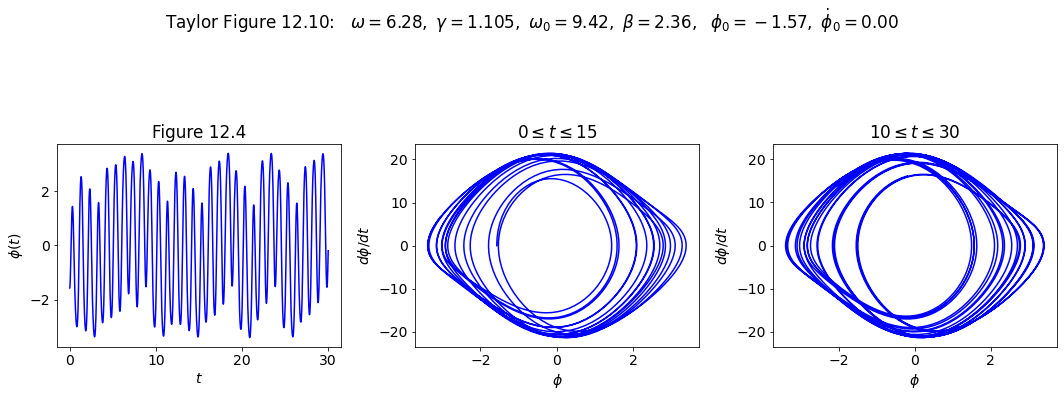

In [7]:
# initial conditions specified
phi_0 = -np.pi / 2.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.10:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=15   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 0., 30.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.4', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=15   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 0., 15.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 15$', 
            ax=ax_b)    

# third plot: state space plot from t= to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 10., 30.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 30$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.10.png', bbox_inches='tight')  # always bbox_inches='tight'

Maybe we just didn't wait long enough!  Let's try t from 30 to 60 instead:

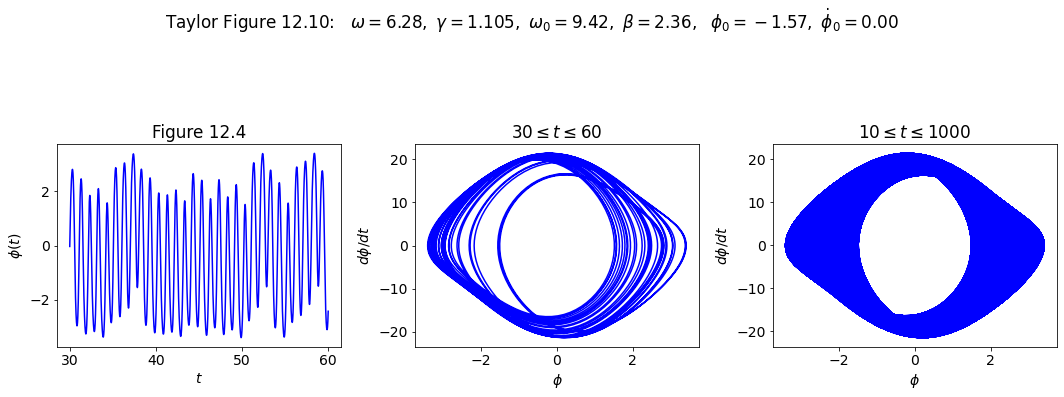

In [12]:
# initial conditions specified
phi_0 = -np.pi / 2.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.10:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=15   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 30., 60.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.4', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=15   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 30., 60.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$30 \leq t \leq 60$', 
            ax=ax_b)    

# third plot: state space plot from t= to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 10., 1000.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 1000$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.10.png', bbox_inches='tight')  # always bbox_inches='tight'

Let's check for periodicity after the transients die out.  Print out phi(t) once every period of the external driving force.

In [10]:
# First pass at periodicity check
start, stop = start_stop_indices(t_pts, 50., 100.)    
tau_ext = 2.*np.pi / omega_ext
delta_index = int(tau_ext / delta_t)

print('   t     phi(t)')
for index in range(start, stop, delta_index):
    print(f'  {t_pts[index]:.1f}   {phi[index]:.4f}')

   t     phi(t)
  50.0   -3.0121
  51.0   -1.1329
  52.0   -0.4359
  53.0   -0.0339
  54.0   -2.1206
  55.0   -2.9694
  56.0   -1.3355
  57.0   -0.9502
  58.0   -0.3119
  59.0   -0.0347
  60.0   -2.3076
  61.0   -3.0284
  62.0   -1.0558
  63.0   -0.2880
  64.0   -0.0344
  65.0   -2.2075
  66.0   -3.0219
  67.0   -1.0851
  68.0   -0.3408
  69.0   -0.0351
  70.0   -2.3913
  71.0   -2.9865
  72.0   -1.2602
  73.0   -0.7408
  74.0   -0.1000
  75.0   -0.1780
  76.0   -0.0485
  77.0   -0.7578
  78.0   -0.1151
  79.0   -0.1277
  80.0   -0.1047
  81.0   -0.1685
  82.0   -0.0542
  83.0   -0.6220
  84.0   -0.0514
  85.0   -0.6607
  86.0   -0.0638
  87.0   -0.4467
  88.0   -0.0336
  89.0   -1.9392
  90.0   -2.7313
  91.0   -2.3114
  92.0   -3.0185
  93.0   -1.1036
  94.0   -0.3762
  95.0   -0.0350
  96.0   -2.3664
  97.0   -3.0036
  98.0   -1.1772
  99.0   -0.5339


Now trying the power spectrum in steady state, plotting only positive frequencies and cutting off any lower peaks from noise.  We multiply the frequencies by $2\pi$ to get the angular frequency.  **What do you observe?**

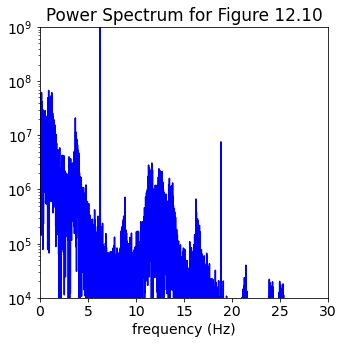

In [13]:
start, stop = start_stop_indices(t_pts, 20., t_end)    
signal = phi[start:stop]
power_spectrum = np.abs(np.fft.fft(signal))**2
freqs = 2.*np.pi * np.fft.fftfreq(signal.size, delta_t)
idx = np.argsort(freqs)

fig_ps = plt.figure(figsize=(5,5))
ax_ps = fig_ps.add_subplot(1,1,1)
ax_ps.semilogy(freqs[idx], power_spectrum[idx], color='blue')
ax_ps.set_xlim(0, 30.)
ax_ps.set_ylim(1.e4, 1.e9)
ax_ps.set_xlabel('frequency (Hz)')
ax_ps.set_title('Power Spectrum for Figure 12.10')

fig_ps.tight_layout()


In [14]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 3000.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.105
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


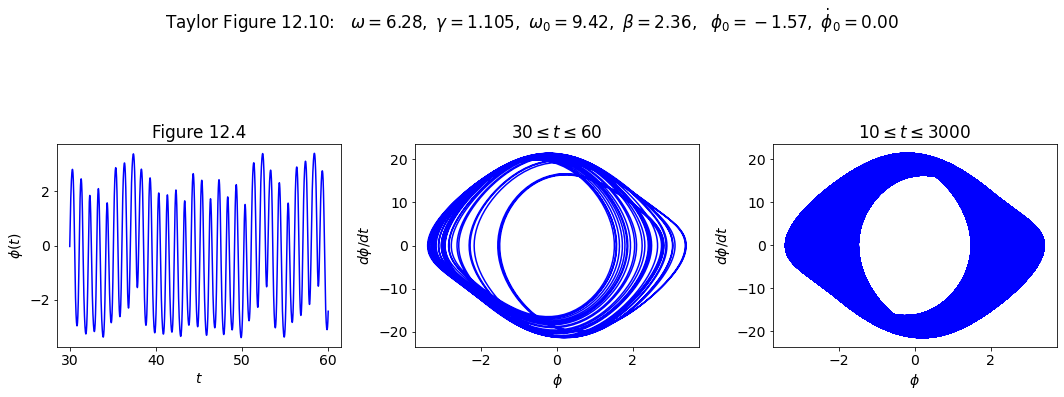

In [15]:
# initial conditions specified
phi_0 = -np.pi / 2.
phi_dot_0 = 0.0
phi, phi_dot = p1.solve_ode(phi_0, phi_dot_0)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(15,5))
overall_title = 'Taylor Figure 12.10:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f},$' + \
                rf'  $\phi_0 = {phi_0:.2f},$' + \
                rf' $\dot\phi_0 = {phi_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: plot from t=0 to t=15   
ax_a = fig.add_subplot(1,3,1)                  

start, stop = start_stop_indices(t_pts, 30., 60.)    
plot_y_vs_x(t_pts[start : stop], phi[start : stop], 
            axis_labels=phi_vs_time_labels, 
            color='blue',
            label=None, 
            title='Figure 12.4', 
            ax=ax_a)    
                              
# second plot: state space plot from t=0 to t=15   
ax_b = fig.add_subplot(1,3,2)                  

start, stop = start_stop_indices(t_pts, 30., 60.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$30 \leq t \leq 60$', 
            ax=ax_b)    

# third plot: state space plot from t= to t=12   
ax_c = fig.add_subplot(1,3,3)                  

start, stop = start_stop_indices(t_pts, 10., 3000.)    
plot_y_vs_x(phi[start : stop], phi_dot[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 3000$', 
            ax=ax_c)    

fig.tight_layout()
fig.savefig('Figure_12.10.png', bbox_inches='tight')  # always bbox_inches='tight'

## Make plots for Taylor figure 12.11 in section 12.5

This time we plot $\Delta \phi$.

In [16]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 0.1
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


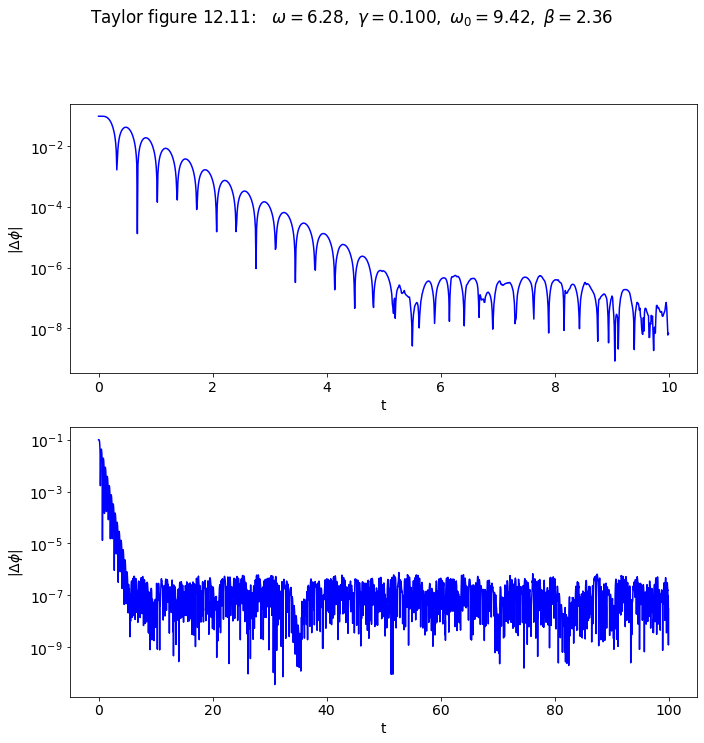

In [17]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0)

phi_0_2 = phi_0_1 - .1   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.11:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 10.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.11.png', bbox_inches='tight')  

What is setting the limit here?  Here it "real" or a numerical artifact?

Repeat but change `abserr` and `relerr` to `1.e-10`, which is $1.0 \times 10^{-10}$.

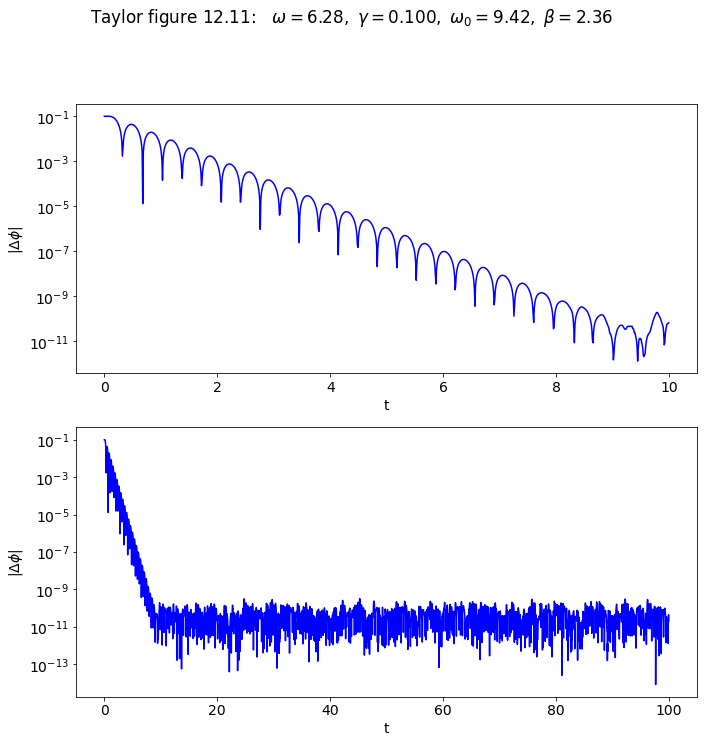

In [18]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = phi_0 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 - .1   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.11:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 10.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.11.png', bbox_inches='tight')  

Ok, now we see the expect exponential decay from the linear regime:
  
  $\begin{align}
    \Delta\phi(t) = D e^{-\beta t} \cos(\omega_1 t - \delta)
  \end{align}$
  
which implies an exponential decay times an oscillating term, meaning we get something like the graph!
  
Does the slope work out?  We see that $\log_{10}\Delta\phi$ vs. $t$ is a straight line.  But
  
  $\begin{align}
    \log_{10}[\Delta\phi(t)] = \log_{10}D - \beta t \log_{10}e + \log_{10} \cos(\omega_1 t - \delta)
  \end{align}$

so on a semi-log plot, the slope is $-\beta\log_{10} e$.  At $t$ goes from 0 to 10, $\log_{10}[\Delta\phi(t)]$ goes from $-1$ to $-11$, so the slope is about $-1$.  Therefore, this predicts $\beta \approx 1/ \log_{10} e$.  Check it out:


In [16]:
1./np.log10(np.e)

2.302585092994046

Yep, it works!  Let's check the state space plots together:

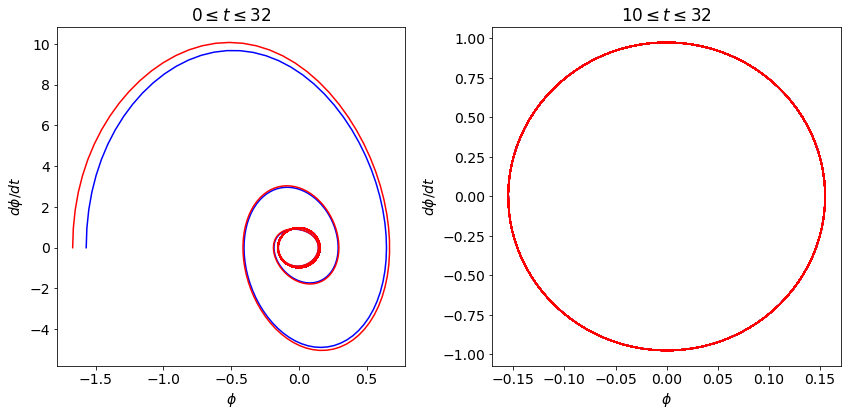

In [19]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 10., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 32$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.12: Looking at $\Delta\phi$ for $\gamma = 1.07$ 


In [20]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.07
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

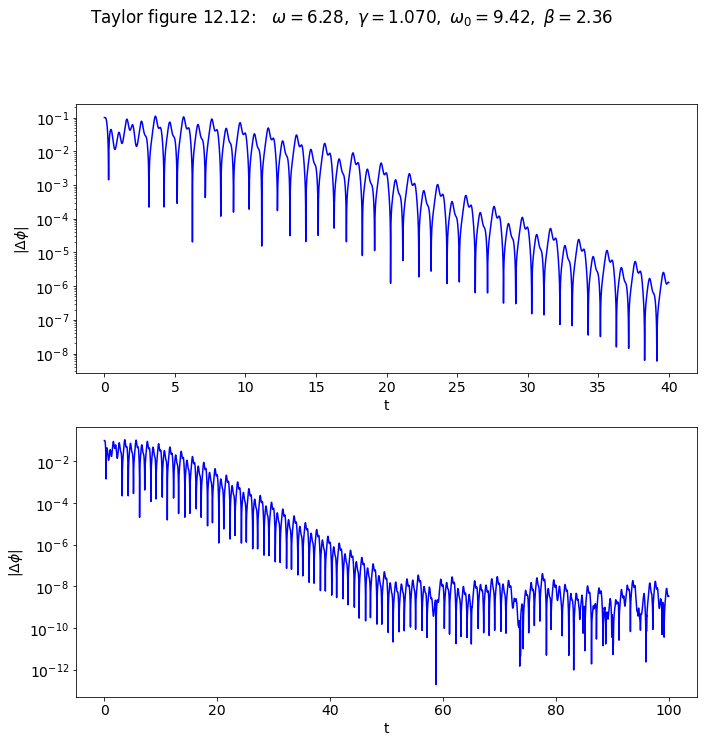

In [21]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 - .1   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.12:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=100 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 100.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.12.png', bbox_inches='tight')  

Let's check the state space plots together:

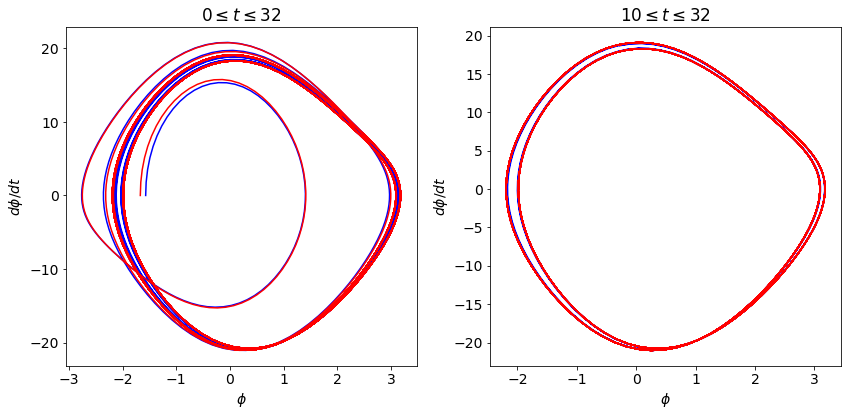

In [22]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 10., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$10 \leq t \leq 32$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.13: Looking at $\Delta\phi$ for $\gamma = 1.105$ 


In [23]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.105
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

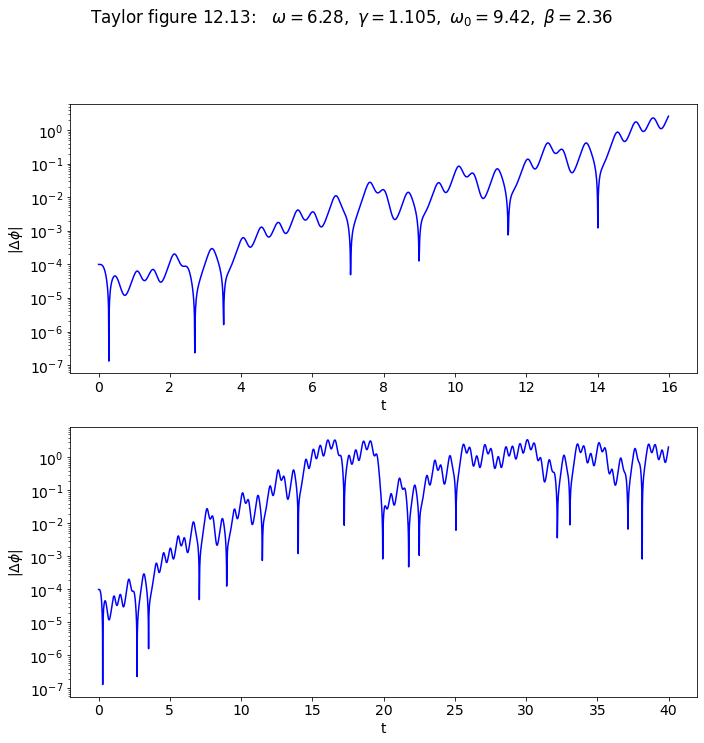

In [24]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 + 1.e-4   # .1 radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.13:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=16 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 16.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.13.png', bbox_inches='tight')  

Let's check the state space plots together:

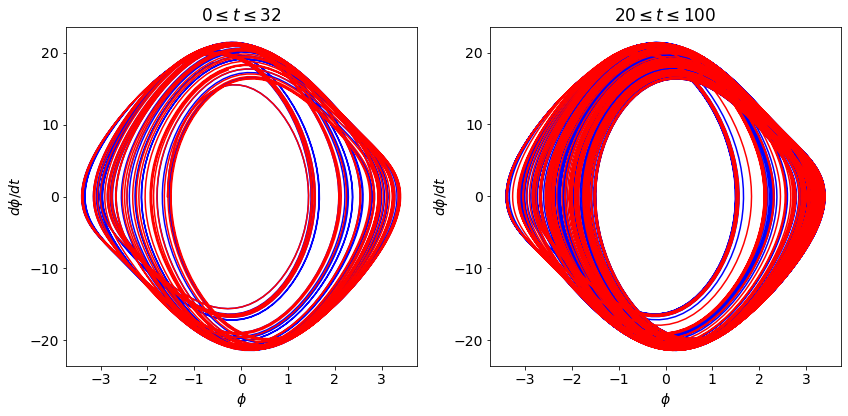

In [25]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 20., 100)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$20 \leq t \leq 100$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.14: Looking at $\Delta\phi$ for $\gamma = 1.13$ 


In [26]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.13
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

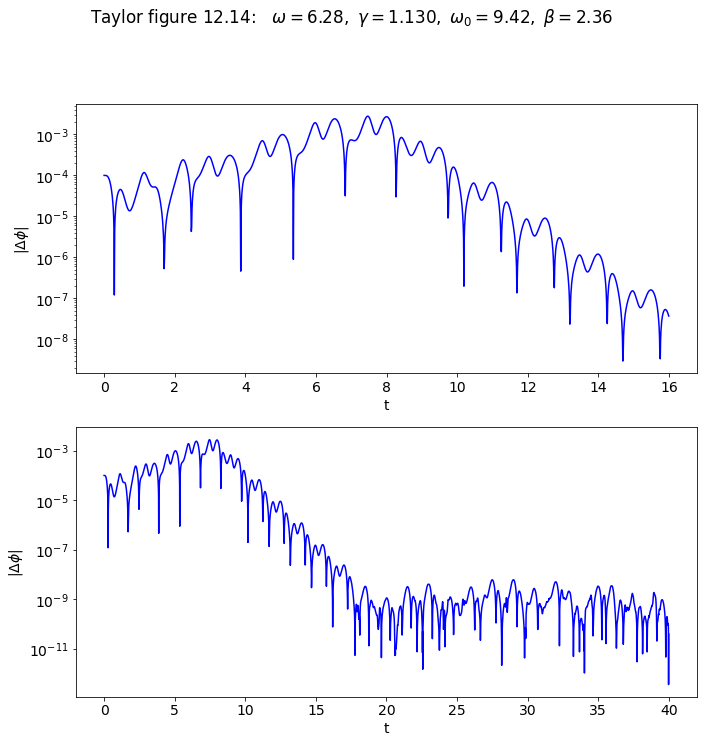

In [27]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 + 1.e-4   # 10^{-3} radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.14:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=16 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 16.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.14.png', bbox_inches='tight')  

Let's check the state space plots together:

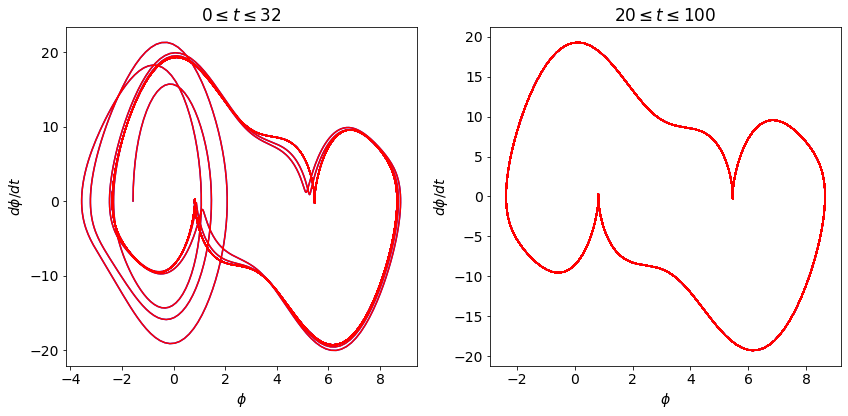

In [28]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 32)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 32$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 20., 100)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$20 \leq t \leq 100$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()


## Make plots for Taylor figure 12.15: Looking at $\Delta\phi$ for $\gamma = 1.503$ 


In [29]:
# Labels for individual plot axes
phi_vs_time_labels = (r'$t$', r'$\phi(t)$')
Delta_phi_vs_time_labels = (r'$t$', r'$\Delta\phi(t)$')
phi_dot_vs_time_labels = (r'$t$', r'$d\phi/dt(t)$')
state_space_labels = (r'$\phi$', r'$d\phi/dt$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Common pendulum parameters
gamma_ext = 1.503
omega_ext = 2.*np.pi
phi_ext = 0.

omega_0 = 1.5*omega_ext
beta = omega_0/4.

# Instantiate a pendulum 
p1 = Pendulum(omega_0=omega_0, beta=beta, 
              gamma_ext=gamma_ext, omega_ext=omega_ext, phi_ext=phi_ext)

# calculate the driving force for t_pts
driving = p1.driving_force(t_pts)


Set `abserr` and `relerr` to `1.e-10` from the beginning.

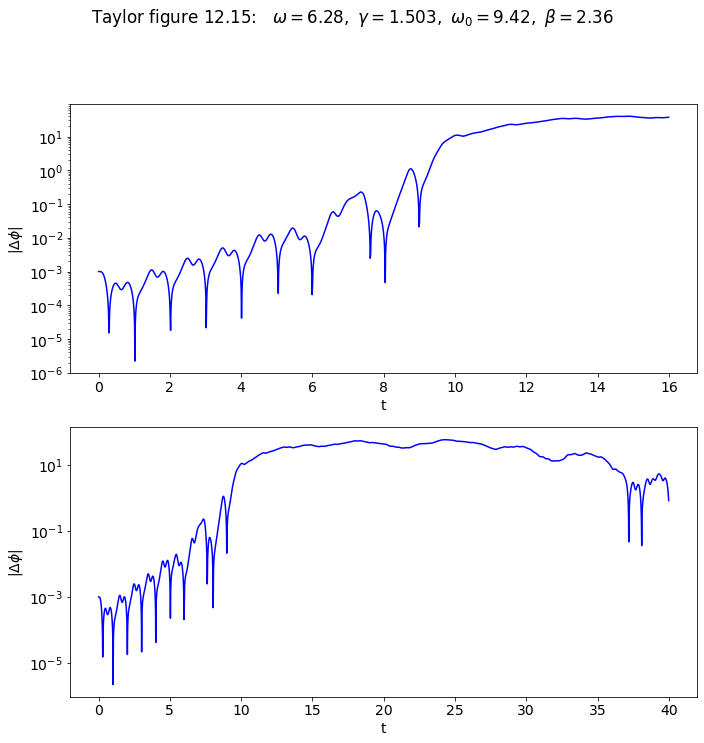

In [30]:
# make a plot of Delta phi for same pendulum but two different initial conds
phi_0_1 = -np.pi / 2.
phi_dot_0 = 0.0
phi_1, phi_dot_1 = p1.solve_ode(phi_0_1, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

phi_0_2 = phi_0_1 + 1.e-3   # 10^{-3} radian lower
phi_dot_0 = 0.0
phi_2, phi_dot_2 = p1.solve_ode(phi_0_2, phi_dot_0,
                                abserr=1.e-10, relerr=1.e-10)

# Calculate the absolute value of \phi_2 - \phi_1
Delta_phi = np.fabs(phi_2 - phi_1)

# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.15:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=16 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 16.)
ax_a.semilogy(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$|\Delta\phi|$')

ax_b = fig.add_subplot(2,1,2)                  

start, stop = start_stop_indices(t_pts, 0., 40.)
plot_y_vs_x(t_pts[start : stop], Delta_phi[start : stop], 
            color='blue', label=None, semilogy=True)    
ax_b.set_xlabel('t')
ax_b.set_ylabel(r'$|\Delta\phi|$')
                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
fig.savefig('figure_12.15.png', bbox_inches='tight')  

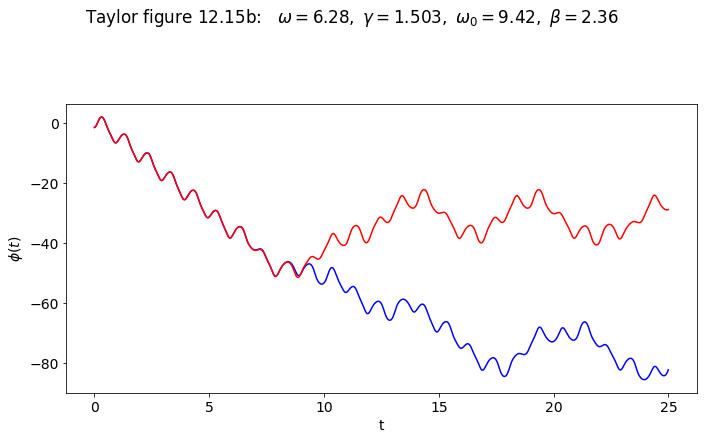

In [31]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

# start the plot!
fig = plt.figure(figsize=(10,10))
overall_title = 'Taylor figure 12.15b:  ' + \
                rf' $\omega = {omega_ext:.2f},$' + \
                rf' $\gamma = {gamma_ext:.3f},$' + \
                rf' $\omega_0 = {omega_0:.2f},$' + \
                rf' $\beta = {beta:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# two plot: plot from t=0 to t=8 and another from t=0 to t=25 
ax_a = fig.add_subplot(2,1,1)                  

start, stop = start_stop_indices(t_pts, 0., 25.)
ax_a.plot(t_pts[start : stop], phi_1[start : stop], 
            color='blue', label=None)    
ax_a.plot(t_pts[start : stop], phi_2[start : stop], 
            color='red', label=None)    
ax_a.set_xlabel('t')
ax_a.set_ylabel(r'$\phi(t)$')

                              
fig.tight_layout()
# always bbox_inches='tight' for best results.  Further adjustments also.
#fig.savefig('figure_12.15b.png', bbox_inches='tight')  

Let's check the state space plots together:

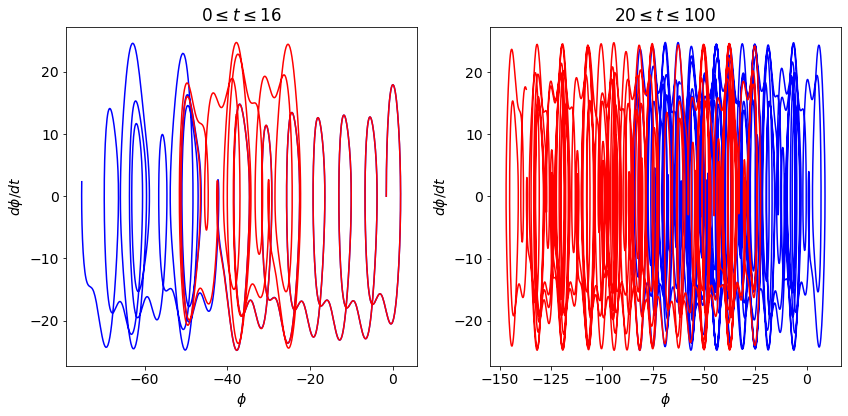

In [32]:
fig_ss = plt.figure(figsize=(12,6))

ax_ss1 = fig_ss.add_subplot(1,2,1)
start, stop = start_stop_indices(t_pts, 0., 16)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$0 \leq t \leq 16$', 
            ax=ax_ss1)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss1)    

# now skip the transients  
ax_ss2 = fig_ss.add_subplot(1,2,2)
start, stop = start_stop_indices(t_pts, 20., 100)    
plot_y_vs_x(phi_1[start : stop], phi_dot_1[start : stop], 
            axis_labels=state_space_labels, 
            color='blue',
            label=None, 
            title=rf'$20 \leq t \leq 100$', 
            ax=ax_ss2)    
plot_y_vs_x(phi_2[start : stop], phi_dot_2[start : stop], 
            axis_labels=state_space_labels, 
            color='red',
            label=None, 
            title=None, 
            ax=ax_ss2)    

fig_ss.tight_layout()
